In [39]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
# # If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# # And right click on the 'Download Manually' link to get a new URL to the dataset

# # Note: This is a very large dataset and will take some time to download

# !wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [ ]:
# local_zip = 'kagglecatsanddogs_5340.zip'
# zip_ref   = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall()
# zip_ref.close()

In [40]:
source_path = 'PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [41]:
# Define root directory
root_dir = 'cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

In [42]:
# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path, 'training/cats'))
    os.makedirs(os.path.join(root_path, 'training/dogs'))
    os.makedirs(os.path.join(root_path, 'testing/cats'))
    os.makedirs(os.path.join(root_path, 'testing/dogs'))
  
    #Creates directories for the train and test sets
    #root_path (string) - the base directory path to create subdirectories from
  
    # Use os.makedirs to create your directories with intermediate subdirectories
    # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
    
    pass

  ### END CODE HERE

In [43]:
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

In [ ]:
#SPLIT DATASET


In [90]:
# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    list_dir = []
    for files in os.listdir(SOURCE_DIR):
        if os.path.getsize(os.path.join(SOURCE_DIR, files)) > 0:
            list_dir.append(files)
        else:
            print(f"{files} is zero length, so ignoring")
        
        training_length = int(len(list_dir) * SPLIT_SIZE)
        testing_length = int(len(list_dir) - training_length)
        shuffled_set = random.sample(list_dir, len(list_dir))
        training_set = shuffled_set[0:training_length]
        testing_set = shuffled_set[-testing_length:]
    
    for files in training_set:
        copyfile(os.path.join(SOURCE_DIR, files), os.path.join(TRAINING_DIR, files))
        
    for files in testing_set:
        copyfile(os.path.join(SOURCE_DIR, files), os.path.join(VALIDATION_DIR, files))
    
    pass




In [91]:
VALIDATION_CATS_DIR

'cats-v-dogs/testing/cats/'

In [92]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "PetImages/Cat/"
DOG_SOURCE_DIR = "PetImages/Dog/"

TRAINING_DIR = "cats-v-dogs/training/"
VALIDATION_DIR = "cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

In [93]:
os.listdir(VALIDATION_CATS_DIR)

[]

In [94]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
    for file in os.scandir(TRAINING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
    for file in os.scandir(TRAINING_DOGS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
    for file in os.scandir(VALIDATION_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
    for file in os.scandir(VALIDATION_DOGS_DIR):
        os.remove(file.path)

In [95]:

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring
7775.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


There are 11250 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [96]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  
  train_datagen = ImageDataGenerator(rescale = 1./255)

  
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='binary',
                                                                target_size=(150, 150))

  return train_generator, validation_generator


In [97]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22497 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [98]:
# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(), 
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'), 
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
      tf.keras.layers.Dense(1, activation='sigmoid')  ,
  ])

  
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model


In [99]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

2022-06-17 15:42:03.081211: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-17 15:42:03.081838: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-17 15:42:03.082994: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fadilrisdian-X455LAB): /proc/driver/nvidia/version does not exist
2022-06-17 15:42:03.092575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-17 15:42:03.234617: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 378798

Epoch 1/15


2022-06-17 15:42:04.040248: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37879808 exceeds 10% of free system memory.
2022-06-17 15:42:04.064205: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 37879808 exceeds 10% of free system memory.


396/450 [=========================>....] - ETA: 51s - loss: 0.6186 - accuracy: 0.6578

/home/fadilrisdian/anaconda3/envs/coursera/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


450/450 [==============================] - 441s 977ms/step - loss: 0.6085 - accuracy: 0.6671 - val_loss: 0.5073 - val_accuracy: 0.7460
Epoch 2/15
450/450 [==============================] - 439s 976ms/step - loss: 0.4612 - accuracy: 0.7837 - val_loss: 0.4899 - val_accuracy: 0.7580
Epoch 3/15
450/450 [==============================] - 488s 1s/step - loss: 0.3820 - accuracy: 0.8291 - val_loss: 0.3978 - val_accuracy: 0.8188
Epoch 4/15
450/450 [==============================] - 438s 974ms/step - loss: 0.3169 - accuracy: 0.8602 - val_loss: 0.4004 - val_accuracy: 0.8348
Epoch 5/15
450/450 [==============================] - 422s 938ms/step - loss: 0.2401 - accuracy: 0.8988 - val_loss: 0.4247 - val_accuracy: 0.8224
Epoch 6/15
450/450 [==============================] - 424s 942ms/step - loss: 0.1625 - accuracy: 0.9349 - val_loss: 0.4947 - val_accuracy: 0.8384
Epoch 7/15
450/450 [==============================] - 426s 946ms/step - loss: 0.0936 - accuracy: 0.9664 - val_loss: 0.5543 - val_accuracy:

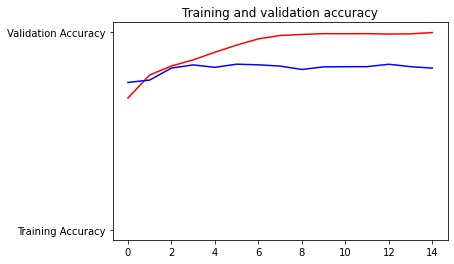

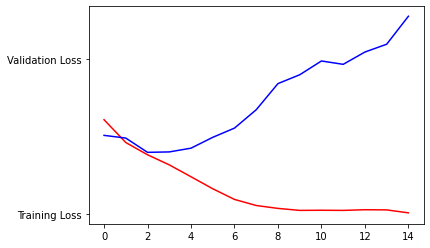

In [100]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()